# Amazon sale Report

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [26]:
df=pd.read_csv('Amazon Sale Report.csv',encoding='unicode_escape')

In [30]:
df.shape

(128976, 21)

In [36]:
df.head(5)

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [38]:
df.tail()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
128971,128970,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,False,NaN,NaN,NaN
128972,128971,402-9551604-7544318,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,M,Shipped,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,False,NaN,NaN,NaN
128973,128972,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,Blazzer,XXL,Shipped,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,False,NaN,NaN,NaN
128974,128973,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,XS,Shipped,...,INR,1199.0,Halol,Gujarat,389350.0,IN,False,NaN,NaN,NaN
128975,128974,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,T-shirt,S,Shipped,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,False,NaN,NaN,NaN


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [44]:
# drop unrelated/blank columns
df.drop(['New','PendingS'],axis=1,inplace=True)

In [46]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,0,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,1,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,1,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,0,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,1,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN


In [50]:
pd.isnull(df)
#checking null value

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128971,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128972,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128973,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
128974,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True


In [52]:
# sum will give total values of null
pd.isnull(df).sum()

index                     0
Order ID                  0
Date                      0
Status                    0
Fulfilment                0
Sales Channel             0
ship-service-level        0
Category                  0
Size                      0
Courier Status            0
Qty                       0
currency               7800
Amount                 7800
ship-city                35
ship-state               35
ship-postal-code         35
ship-country             35
B2B                       0
fulfilled-by          89713
dtype: int64

In [54]:
df.shape

(128976, 19)

In [56]:
# drop null values
df.dropna(inplace=True)

In [58]:
df.shape

(37514, 19)

In [60]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Qty',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

In [62]:
# change data type
df['ship-postal-code']=df['ship-postal-code'].astype('int')

In [64]:
# checking whether the data type change or not
df['ship-postal-code'].dtype

dtype('int32')

In [68]:
df['Date']=pd.to_datetime (df['Date'])

In [70]:
# describe() method return description of the data in the data data frame (i,e, count,mean,max,avg
df.describe()

,index,Date,Qty,Amount,ship-postal-code
count,37514.000000,37514,37514.000000,37514.000000,37514.000000
mean,60953.809858,2022-05-11 07:56:47.303939840,0.867383,646.553960,463291.552754
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.000000
25%,27235.250000,2022-04-20 00:00:00,1.000000,458.000000,370465.000000
50%,63470.500000,2022-05-09 00:00:00,1.000000,629.000000,500019.000000
75%,91790.750000,2022-06-01 00:00:00,1.000000,771.000000,600042.000000
max,128891.000000,2022-06-29 00:00:00,5.000000,5495.000000,989898.000000
std,36844.853039,NaN,0.354160,279.952414,194550.425637


In [76]:
# rename columns 
df.rename(columns={'Qty':'Quantity'},inplace=True)

In [91]:
# describe is only used for numeric columns but if we want to use in object we can use include
df.describe(include='object')

,Order ID,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,currency,ship-city,ship-state,ship-country,fulfilled-by
count,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514,37514
unique,34664,11,1,1,1,8,11,3,1,4698,58,1,1
top,171-5057375-2831560,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,T-shirt,M,Shipped,INR,BENGALURU,MAHARASHTRA,IN,Easy Ship
freq,12,28741,37514,37514,37514,14062,6806,31859,37514,2839,6236,37514,37514


In [94]:
# use describe() for specific columns
df[['Quantity','Amount']].describe()

,Quantity,Amount
count,37514.000000,37514.000000
mean,0.867383,646.553960
std,0.354160,279.952414
min,0.000000,0.000000
25%,1.000000,458.000000
50%,1.000000,629.000000
75%,1.000000,771.000000
max,5.000000,5495.000000


# EDA EXPLORATORY DATA ANALYSIS

In [97]:
df.columns

Index(['index', 'Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel',
       'ship-service-level', 'Category', 'Size', 'Courier Status', 'Quantity',
       'currency', 'Amount', 'ship-city', 'ship-state', 'ship-postal-code',
       'ship-country', 'B2B', 'fulfilled-by'],
      dtype='object')

C:\Users\namde\AppData\Local\Temp\ipykernel_19800\2977560146.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Size',data=df,palette='Set3')


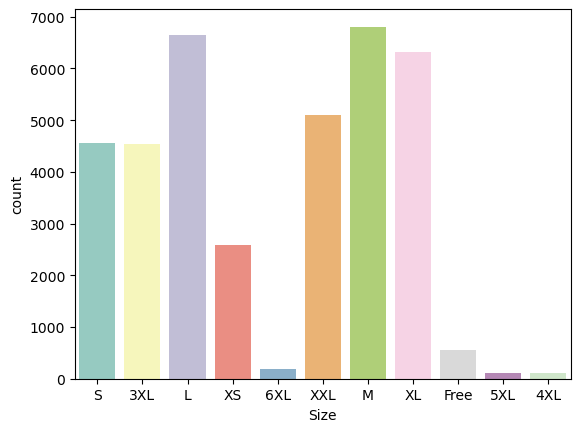

In [107]:
ax=sns.countplot(x='Size',data=df,palette='Set3')

C:\Users\namde\AppData\Local\Temp\ipykernel_19800\2239895562.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Size',data=df,palette='Set3')


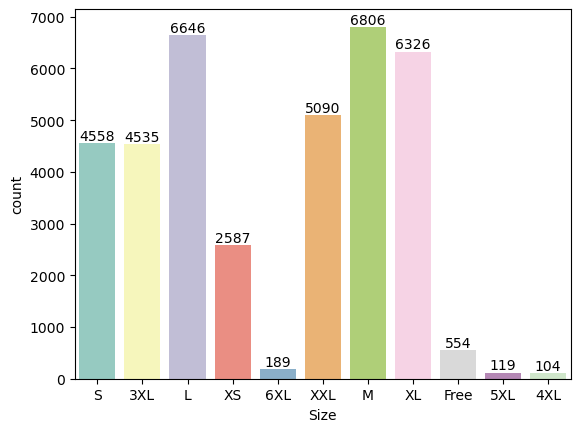

In [121]:
ax=sns.countplot(x='Size',data=df,palette='Set3')

for bars in ax.containers:
    ax.bar_label(bars)

In [ ]:
# Group by 

In [123]:
df.groupby(['Size'], as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)

,Size,Quantity
6,M,5905
5,L,5795
8,XL,5481
10,XXL,4465
0,3XL,3972
7,S,3896
9,XS,2191
4,Free,467
3,6XL,170
2,5XL,104


C:\Users\namde\AppData\Local\Temp\ipykernel_19800\4236135041.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Size',y='Quantity',data=S_Quantity, palette='Set2')


<Axes: xlabel='Size', ylabel='Quantity'>

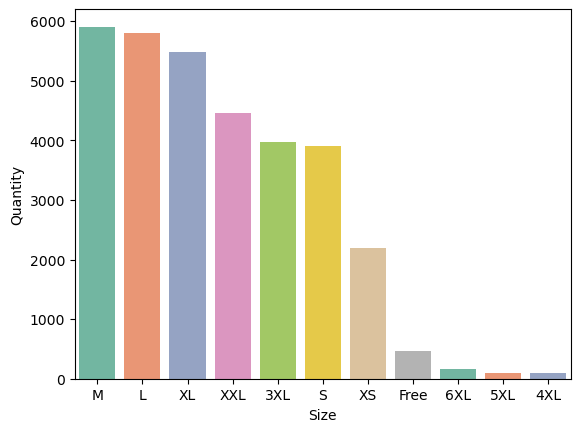

In [127]:
S_Quantity=df.groupby(['Size'], as_index=False)['Quantity'].sum().sort_values(by='Quantity',ascending=False)
sns.barplot(x='Size',y='Quantity',data=S_Quantity, palette='Set2')

In [ ]:
#Courier status

<Axes: xlabel='Courier Status', ylabel='count'>

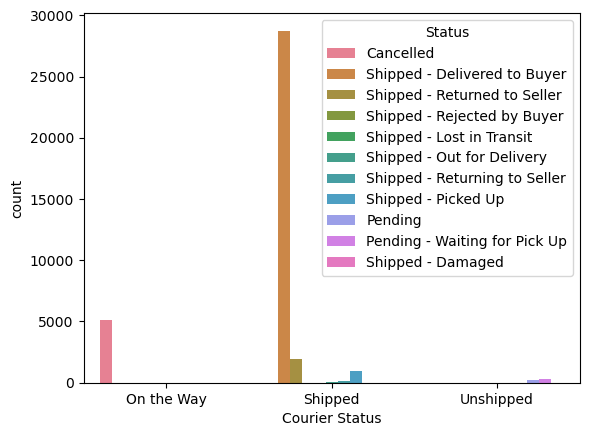

In [141]:
sns.countplot(data=df,x='Courier Status',hue='Status')


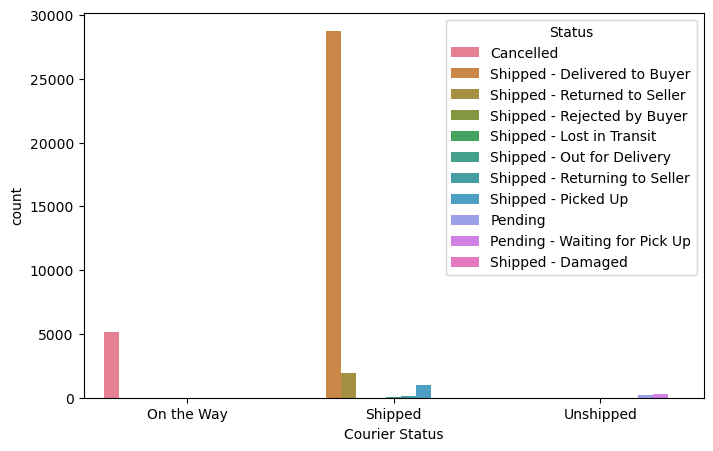

In [147]:
plt.figure(figsize=(8,5))
ax=sns.countplot(data=df,x='Courier Status',hue='Status')
plt.show()

<Axes: >

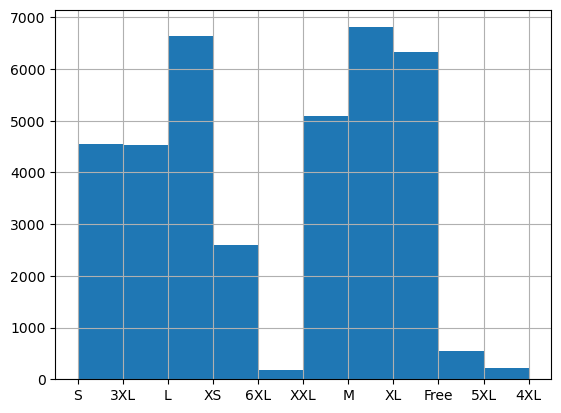

In [149]:
#histogram
df['Size'].hist()

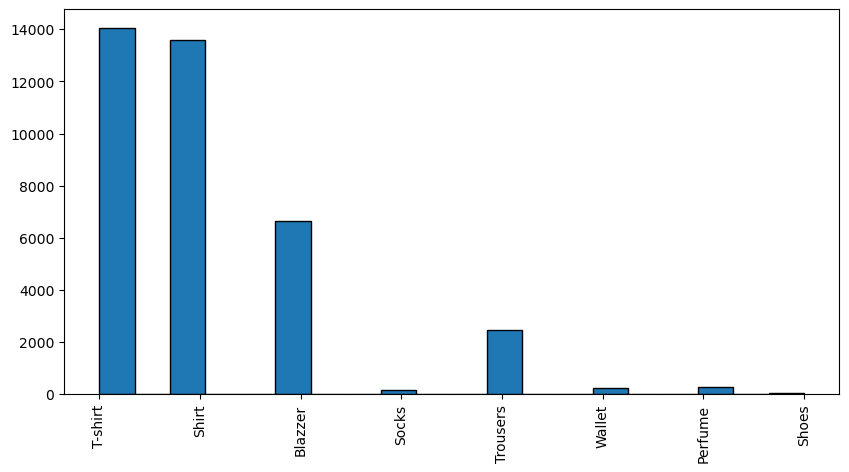

In [163]:
df['Category']=df['Category'].astype(str)
column_data=df['Category']
plt.figure(figsize=(10,5))
plt.hist(column_data,bins=20,edgecolor='black')
plt.xticks(rotation=90)
plt.show()

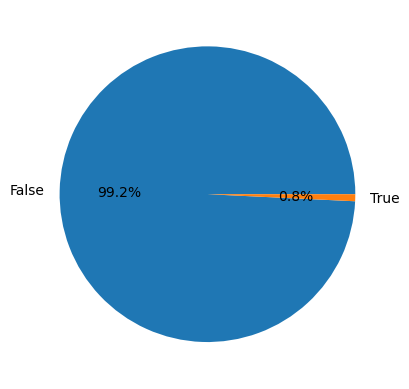

In [167]:
# checking b2b data by using pie chart
B2B_Check=df['B2B'].value_counts()

plt.pie(B2B_Check,labels=B2B_Check.index,autopct='%1.1f%%')
plt.show()

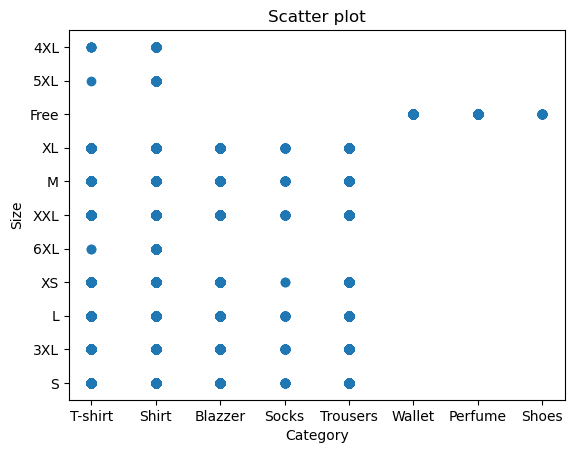

In [169]:
# prepare data for scatter plot
x_data=df['Category']
y_data=df['Size']

# plot the scatter plot
plt.scatter(x_data,y_data)
plt.xlabel('Category')
plt.ylabel('Size')
plt.title('Scatter plot')
plt.show()

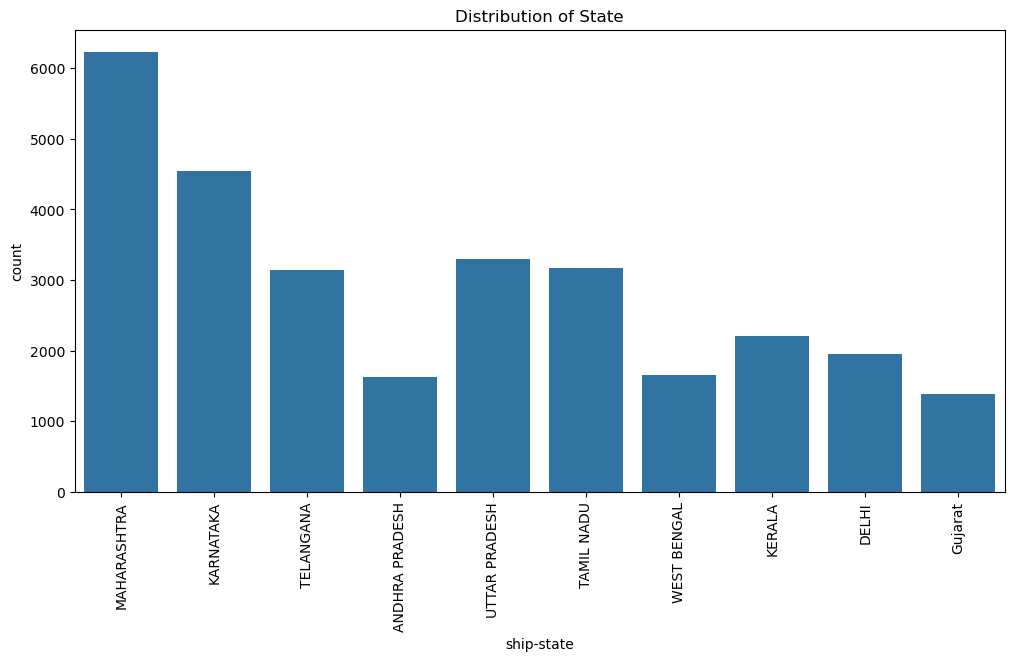

In [185]:
# plot count of cities by state
top_10_states=df['ship-state'].value_counts().head(10)
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['ship-state'].isin(top_10_states.index)], x='ship-state')
plt.xlabel('ship-state')
plt.ylabel('count')
plt.title('Distribution of State')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# conclusion 
#the data analysis revelas that the business has a significant customer base in maharashtra
#state,mainly serves retailers,fulfills orders through Amazon,experiences high demand of t-shirts and sees m-size as the preferred choice among buyers